In [1]:
from IPython.core.display import HTML
HTML('''
<script>
var logoParent = document.getElementById("kernel_logo_widget")
var logo = document.getElementById("kernel_logo_widget").getElementsByClassName("current_kernel_logo")[0];
logo.src = "https://i.ibb.co/mD4jTGQ/itclogo.jpg";
logo.style = "display: inline; width:138px; height:40px";
logoParent.innerHTML = '<a href="https://i.ibb.co/mD4jTGQ/itclogo.jpg">' + logoParent.innerHTML + '</a>';
</script>
''')

<font size=10><b>Model Selection - Exercise</b></font>

# Q1 - Read Data
Load the Wine Quality dataset (data dictionary attached)

In [2]:
import pandas as pd

wine_data = pd.read_csv("winequality-red.csv")

display(wine_data.head())

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


# Q2 - EDA and preprocesssing
Perform a short EDA and basic preprocessing if needed

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

quality
5    681
6    638
7    199
4     53
8     18
3     10
Name: count, dtype: int64

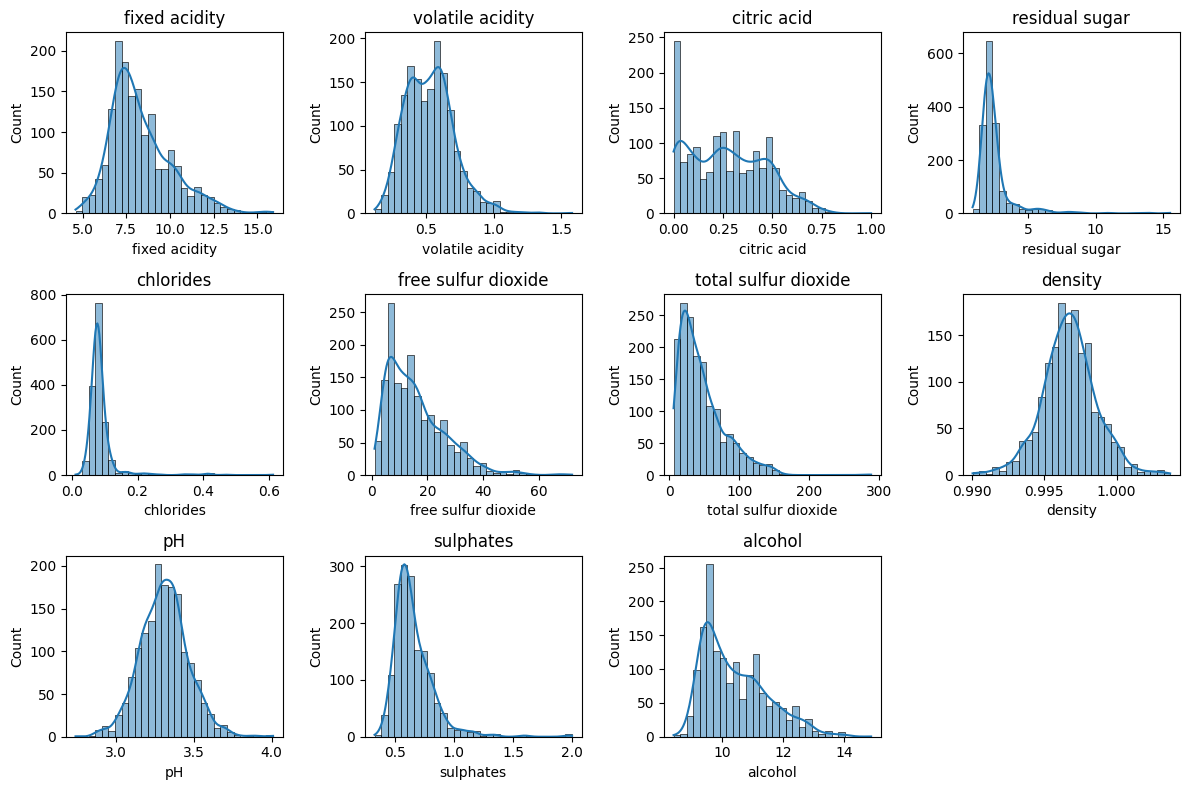

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

display(wine_data.describe())
display(wine_data.isnull().sum())
display(wine_data['quality'].value_counts())

plt.figure(figsize=(12, 8))
for i, column in enumerate(wine_data.columns[:-1]):
    plt.subplot(3, 4, i + 1)
    sns.histplot(wine_data[column], bins=30, kde=True)
    plt.title(column)
plt.tight_layout()
plt.show()


# Q3 - Data set splits
- Separate the data into X (independent features) and y
- Split the data into **train**, **validation** and **test** sets.
- Put the **test set** aside till the final question of the exercise
- In addition to the 3 sets above, also save a dataset that's **train and validation sets together** in 1 DataFrame as `X_train_val` and `y_train_val` (will be needed later).

In [4]:
from sklearn.model_selection import train_test_split

X = wine_data.drop(columns=['quality'])
y = wine_data['quality']

X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.25, random_state=42)

X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

# Q4 - Model selection with validation set
- Refer to the problem as a **regression** problem
- Choose 3 different ML models of **different model types** with default or relatively basic hyperparameters
- Train them **on train set**
- Evaluate all 3 seperately **on validation set**
- Explain which is the best model in your opinion based on **validation metric**

In [5]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error

models = {
    "Linear Regression": LinearRegression(),
    "Random Forest": RandomForestRegressor(random_state=42),
    "Support Vector Machine": SVR()
}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_val)
    mse = mean_squared_error(y_val, y_pred)
    print(f"{name}: Mean Squared Error = {mse}")



Linear Regression: Mean Squared Error = 0.45468924863315685
Random Forest: Mean Squared Error = 0.374119375
Support Vector Machine: Mean Squared Error = 0.5507509282288833


If we are only looking at the mse results, we can see that the smallest one is the one obtained when using a Random Forest, so we will chose this model.

# Q5 - Model selection with cross validation
Choose **one** of the **model types** above and using it do:

## Q5.1 - Cross validation
- Choose a method of cross validation.  Why did you choose it?
- Use the exact hyperparameters chosen in the question above
- Train and evaluate the model using the cross validation method
- Explain the results
- For dataset, **use the train and validation sets together** in 1 DataFrame (`X_train_val` and `y_train_val`)

In [6]:
from sklearn.model_selection import cross_val_score

rf_model = RandomForestRegressor(random_state=42)


cv_scores = cross_val_score(rf_model, X_train_val, y_train_val, cv=5, scoring='neg_mean_squared_error')

cv_scores = -cv_scores

print("Cross Validation Scores (MSE):", cv_scores)
print("Mean MSE:", cv_scores.mean())

Cross Validation Scores (MSE): [0.2726293  0.43010977 0.36362734 0.3489957  0.36093922]
Mean MSE: 0.3552602650122549


I chose k-fold cross-validation because it provides a robust estimate of model performance by splitting the data into multiple folds.
This helps to reduce the variance.

The cross-validation scores give us an estimate of the model's performance on unseen data.
By averaging the MSE across all folds, we get a more reliable estimate of the model's generalization error.

## Q5.2 - Grid Search
- Perform **Grid Search** of multiple hyperparameters with cross validation
- Report different models cross validation scores
- Which model was chosen by the Grid Search and why?
- For dataset, **use the train and validation sets together** in 1 DataFrame (`X_train_val` and `y_train_val`)

In [7]:
from sklearn.model_selection import GridSearchCV

param_grid = {'max_depth': [None, 10, 20], 'n_estimators': [50, 100, 200]}

rf_model = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')
grid_search.fit(X_train_val, y_train_val)

for mean_score, params in zip(grid_search.cv_results_["mean_test_score"], grid_search.cv_results_["params"]):
    print(f"Mean Squared Error: {-mean_score}  Parameters: {params}")

best_model = grid_search.best_estimator_
print("\nBest Model chosen by Grid Search:", best_model)

Mean Squared Error: 0.3594185453431372  Parameters: {'max_depth': None, 'n_estimators': 50}
Mean Squared Error: 0.3552602650122549  Parameters: {'max_depth': None, 'n_estimators': 100}
Mean Squared Error: 0.3537008144148284  Parameters: {'max_depth': None, 'n_estimators': 200}
Mean Squared Error: 0.3692945417569987  Parameters: {'max_depth': 10, 'n_estimators': 50}
Mean Squared Error: 0.3650408611329009  Parameters: {'max_depth': 10, 'n_estimators': 100}
Mean Squared Error: 0.3650023313267726  Parameters: {'max_depth': 10, 'n_estimators': 200}
Mean Squared Error: 0.35852378685509245  Parameters: {'max_depth': 20, 'n_estimators': 50}
Mean Squared Error: 0.3550118907716365  Parameters: {'max_depth': 20, 'n_estimators': 100}
Mean Squared Error: 0.35329376370689103  Parameters: {'max_depth': 20, 'n_estimators': 200}

Best Model chosen by Grid Search: RandomForestRegressor(max_depth=20, n_estimators=200, random_state=42)


## Q5.3 - Randomized Search
- Perform **Randomized Search** of multiple hyperparameters with cross validation
- Report different models cross validation scores
- Which model was chosen by the Randomized Search and and why?
- For dataset, **use the train and validation sets together** in 1 DataFrame (`X_train_val` and `y_train_val`)

In [8]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.ensemble import RandomForestRegressor

param_dist = {
    'max_depth': [None, 10, 20],
    'n_estimators': randint(50, 200)
}

rf_model = RandomForestRegressor(random_state=42)

random_search = RandomizedSearchCV(estimator=rf_model, param_distributions=param_dist, n_iter=10, cv=5, scoring='neg_mean_squared_error', random_state=42)
random_search.fit(X_train_val, y_train_val)

for mean_score, params in zip(random_search.cv_results_["mean_test_score"], random_search.cv_results_["params"]):
    print(f"Mean Squared Error: {-mean_score}  Parameters: {params}")

best_model = random_search.best_estimator_
print("\nBest Model chosen by Randomized Search:", best_model)

Mean Squared Error: 0.35410335794209435  Parameters: {'max_depth': 20, 'n_estimators': 142}
Mean Squared Error: 0.354353877995538  Parameters: {'max_depth': 20, 'n_estimators': 156}
Mean Squared Error: 0.36015965323629456  Parameters: {'max_depth': None, 'n_estimators': 70}
Mean Squared Error: 0.3540981715426658  Parameters: {'max_depth': 20, 'n_estimators': 171}
Mean Squared Error: 0.353409327550235  Parameters: {'max_depth': 20, 'n_estimators': 124}
Mean Squared Error: 0.35435797050667184  Parameters: {'max_depth': 20, 'n_estimators': 137}
Mean Squared Error: 0.35514108427592467  Parameters: {'max_depth': None, 'n_estimators': 149}
Mean Squared Error: 0.35346445650468883  Parameters: {'max_depth': 20, 'n_estimators': 199}
Mean Squared Error: 0.36014678319424653  Parameters: {'max_depth': None, 'n_estimators': 51}
Mean Squared Error: 0.3658275077891813  Parameters: {'max_depth': 10, 'n_estimators': 87}

Best Model chosen by Randomized Search: RandomForestRegressor(max_depth=20, n_esti

# Q6 - Choose best model
- Compare the **validation metrics** of models received in questions above (4 and 5.1-5.3)
- Which model type and hyperparameters would you choose and why?
- Evaluate the final chosen model on **test set**.  Is the **test metric** received similar to this model's **validation metric**? How confident are you using this model in production?

After comparing the different models, I decide to go with the one found in Q5.3 : RandomForestRegressor(max_depth=20, n_estimators=124, random_state=42), We obtained the best mse (slightly over the one in 5.2 but with less trees so the model is faster)

In [9]:
y_pred_test = best_model.predict(X_test)
test_mse = mean_squared_error(y_test, y_pred_test)

print("Test Mean Squared Error:", test_mse)

Test Mean Squared Error: 0.31221624057492464


We obtained a even better mse than the validation one so I am pretty confident to use this model in production.